In [1]:
import pandas as pd
from mlflux.gotm import read_ensem, read

import matplotlib.dates as mdates
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 3

### Check profiles

In [2]:
''' KPP '''
###### First phase
# ENSEM = 20
# n1 = 121 # number of time steps
# n2 = 200 # number of depth points
# start_date = pd.Timestamp('2012-03-21') # Add start time
# folder = '/home/jw8736/test-gotm/ensem/2012-03-21_2012-05-20/'

# ###### Second phase
# ENSEM = 20
# n1 = 181 # 90 days
# n2 = 200 
# start_date = pd.Timestamp('2012-05-21') 
# folder = '/home/jw8736/test-gotm/ensem/2012-05-21_2012-08-20/'

##### Third phase
ENSEM = 20
n1 = 281 # 140 days
n2 = 200 
start_date = pd.Timestamp('2012-08-21') 
folder = '/home/jw8736/test-gotm/ensem/2012-08-21_2013-01-10/'

##### Fourth phase
# ENSEM = 20
# n1 = 121 # 60 days
# n2 = 200 
# start_date = pd.Timestamp('2013-01-11') 
# folder = '/home/jw8736/test-gotm/ensem/2013-01-11_2013-03-20/'

filename = folder + 'out'
ds_kpp = read_ensem(filename, ENSEM, n1, n2, start_date)

filename_mean = folder + 'out_ann_mean'
ds_kpp_mean = read(filename_mean, n1, n2, start_date)

filename_bulk = folder + 'out_bulk'
ds_kpp_bulk = read(filename_bulk, n1, n2, start_date)

100%|██████████| 20/20 [00:05<00:00,  3.84it/s]


In [3]:
''' k-epsilon '''
ENSEM = 20
n1 = 140*24*6 + 1
n2 = 200 
start_date = pd.Timestamp('2012-08-21') 
folder = '/home/jw8736/test-gotm/ensem/2012-08-21_2013-01-10/'

filename = folder + 'out_ke_10min_'
ds_ke = read_ensem(filename, ENSEM, n1, n2, start_date)

filename_mean = folder + 'out_ann_mean_ke_10min'
ds_ke_mean = read(filename_mean, n1, n2, start_date)

filename_bulk = folder + 'out_bulk_ke_10min'
ds_ke_bulk = read(filename_bulk, n1, n2, start_date)

100%|██████████| 20/20 [02:52<00:00,  8.62s/it]


In [ ]:
# ''' k-epsilon 60 min, waiting '''
# ENSEM = 20
# n1 = 140*24*6 + 1
# n2 = 200 
# start_date = pd.Timestamp('2012-08-21') 
# folder = '/home/jw8736/test-gotm/ensem/2012-08-21_2013-01-10/'

# filename = folder + 'out_ke_60min_'
# ds = read_ensem(filename, ENSEM, n1, n2, start_date)

# filename_mean = folder + 'out_ann_mean_ke_60min'
# ds_mean = read(filename_mean, n1, n2, start_date)

# filename_bulk = folder + 'out_bulk_ke_60min'
# ds_bulk = read(filename_bulk, n1, n2, start_date)

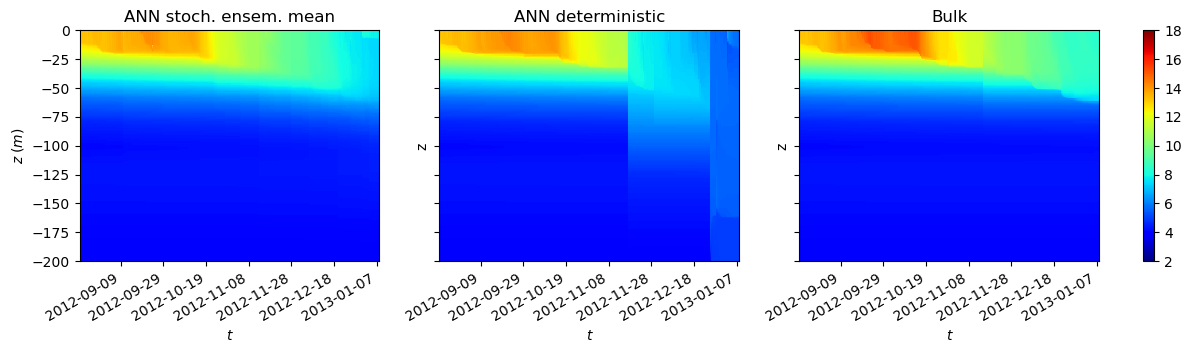

In [5]:
vmin = 2
vmax = 18

c = 'jet'

fig, axes = plt.subplots(1, 3, sharey=True, figsize=[14,3])

ax = axes[0]
T_ensem_mean = ds_kpp.T.mean(dim='ensem')
a = T_ensem_mean.plot(x='t',  cmap=c, vmin=vmin, vmax=vmax, ax=ax, add_colorbar=False)
# a = ds.T.sel(ensem=7).plot.contourf(x='t',  cmap='jet', vmin=vmin, vmax=vmax, levels=31, ax=ax, add_colorbar=False)
ax.set_title('ANN stoch. ensem. mean')
ax.set_ylabel('$z \; (m)$'); ax.set_xlabel('$t$')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))

ax = axes[1]
ds_kpp_mean.T.plot(x='t', cmap=c, vmin=vmin, vmax=vmax, ax=ax, add_colorbar=False)
ax.set_title('ANN deterministic')
ax.set_xlabel('$t$')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))

ax = axes[2]
ds_kpp_bulk.T.plot(x='t', cmap=c, vmin=vmin, vmax=vmax, ax=ax, add_colorbar=False)
ax.set_title('Bulk')
ax.set_xlabel('$t$')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))


cbar = fig.colorbar(a, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

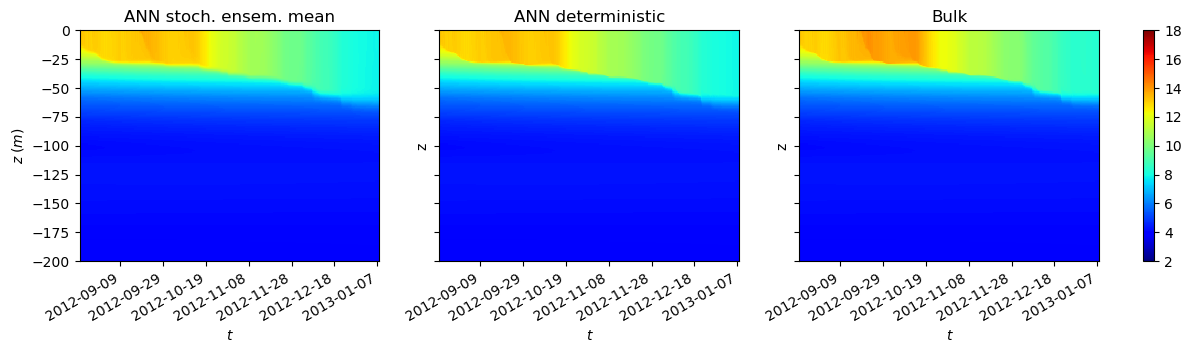

In [6]:
vmin = 2
vmax = 18

c = 'jet'

fig, axes = plt.subplots(1, 3, sharey=True, figsize=[14,3])

ax = axes[0]
T_ensem_mean = ds_ke.T.mean(dim='ensem')
a = T_ensem_mean.plot(x='t',  cmap=c, vmin=vmin, vmax=vmax, ax=ax, add_colorbar=False)
# a = ds.T.sel(ensem=7).plot.contourf(x='t',  cmap='jet', vmin=vmin, vmax=vmax, levels=31, ax=ax, add_colorbar=False)
ax.set_title('ANN stoch. ensem. mean')
ax.set_ylabel('$z \; (m)$'); ax.set_xlabel('$t$')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))

ax = axes[1]
ds_ke_mean.T.plot(x='t', cmap=c, vmin=vmin, vmax=vmax, ax=ax, add_colorbar=False)
ax.set_title('ANN deterministic')
ax.set_xlabel('$t$')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))

ax = axes[2]
ds_ke_bulk.T.plot(x='t', cmap=c, vmin=vmin, vmax=vmax, ax=ax, add_colorbar=False)
ax.set_title('Bulk')
ax.set_xlabel('$t$')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))


cbar = fig.colorbar(a, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

In [24]:
import xarray as xr
path = '/home/jw8736/test-gotm/ensem/2012-01-01_2020-01-01/'
ds_obs = xr.load_dataset(path + 'tprof.nc')

In [26]:
ds_obs

<xarray.Dataset>
Dimensions:  (t: 96432, z: 200)
Coordinates:
  * t        (t) datetime64[ns] 2010-01-01 ... 2020-12-31T23:00:00
  * z        (z) float64 -199.5 -198.5 -197.5 -196.5 ... -3.5 -2.5 -1.5 -0.5
Data variables:
    temp     (t, z) float64 4.906 4.918 4.93 4.942 ... 7.842 7.843 7.843 7.843

(15565.852083333333, 15723.10625)

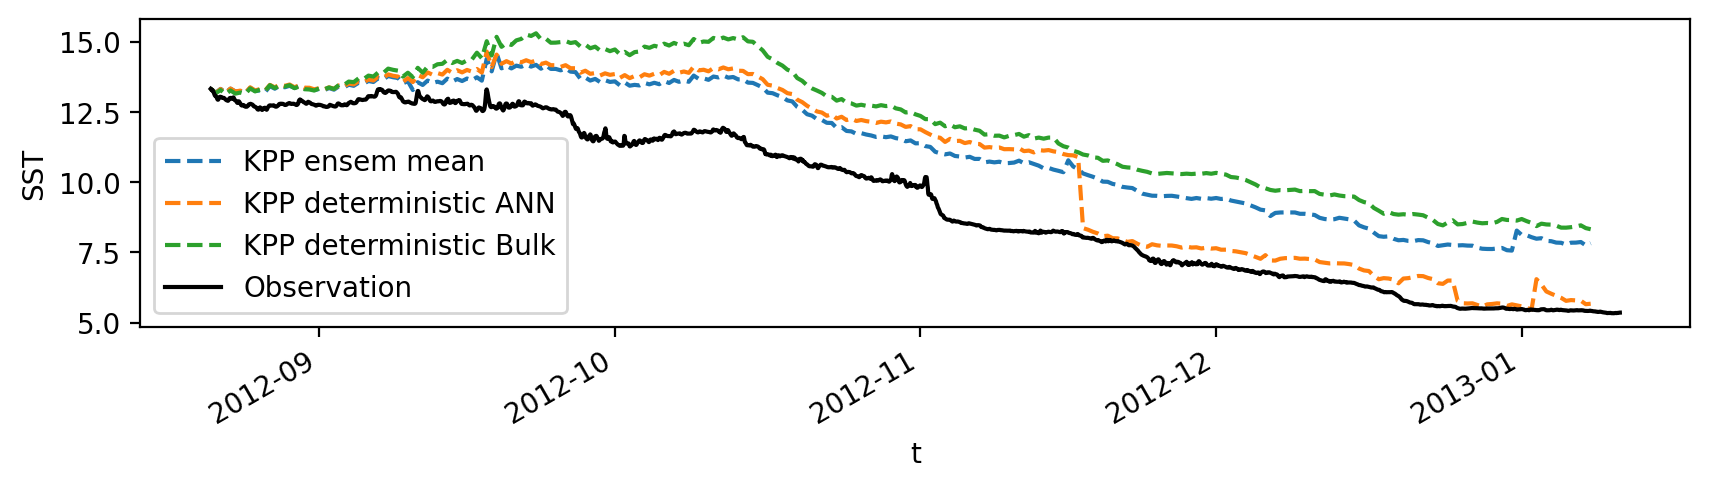

In [29]:
fig = plt.figure(figsize=[10,2], dpi=200)
T_ensem_mean = ds_kpp.T.mean(dim='ensem')
T_ensem_mean.isel(z=-1).plot(label='KPP ensem mean', c='C0', ls='--')
ds_kpp_mean.T.isel(z=-1).plot(label='KPP deterministic ANN', c='C1', ls='--')
ds_kpp_bulk.T.isel(z=-1).plot(label='KPP deterministic Bulk', c='C2', ls='--')
ds_obs.temp.sel(t=slice('2012-08-21','2013-01-10')).isel(z=-1).plot(label='Observation', c='k')
plt.legend(ncol=1)
plt.ylabel('SST')
plt.title('')
plt.xlim()

Text(0.5, 1.0, '')

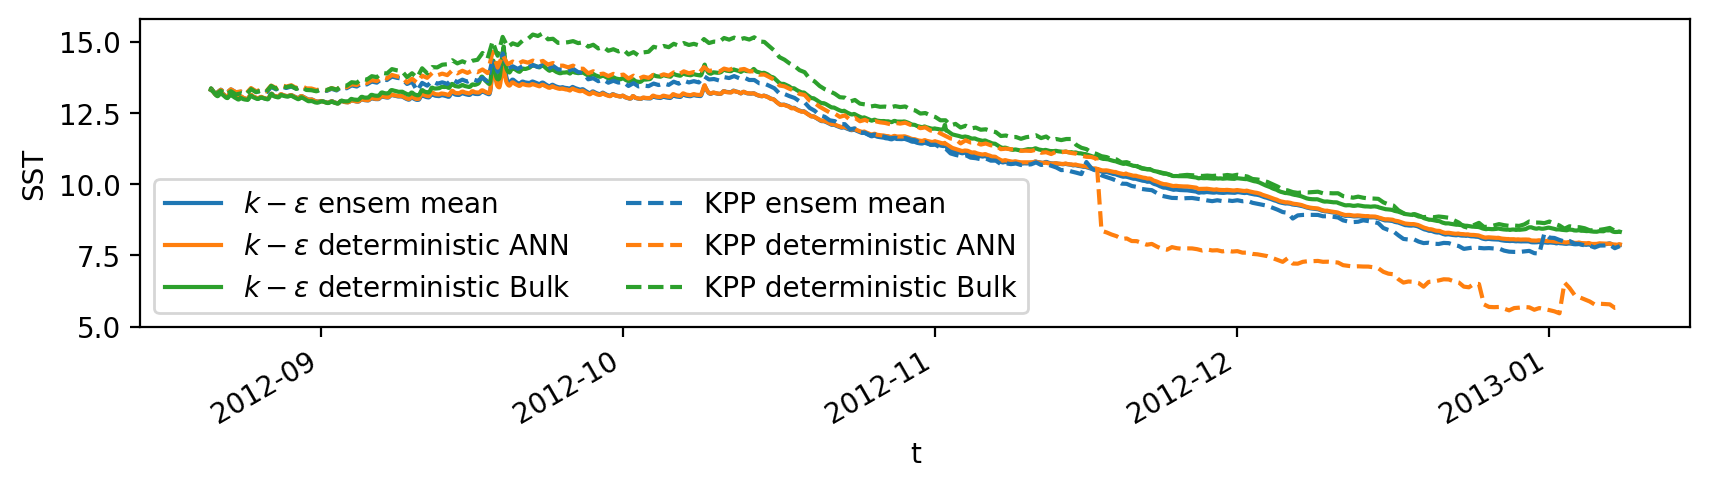

In [19]:
fig = plt.figure(figsize=[10,2], dpi=200)
T_ensem_mean = ds_ke.T.mean(dim='ensem')
T_ensem_mean.isel(z=-1).plot(label='$k-\epsilon$ ensem mean', c='C0')
ds_ke_mean.T.isel(z=-1).plot(label='$k-\epsilon$ deterministic ANN', c='C1')
ds_ke_bulk.T.isel(z=-1).plot(label='$k-\epsilon$ deterministic Bulk', c='C2')
T_ensem_mean = ds_kpp.T.mean(dim='ensem')
T_ensem_mean.isel(z=-1).plot(label='KPP ensem mean', c='C0', ls='--')
ds_kpp_mean.T.isel(z=-1).plot(label='KPP deterministic ANN', c='C1', ls='--')
ds_kpp_bulk.T.isel(z=-1).plot(label='KPP deterministic Bulk', c='C2', ls='--')
plt.legend(ncol=2)
plt.ylabel('SST')
plt.title('')

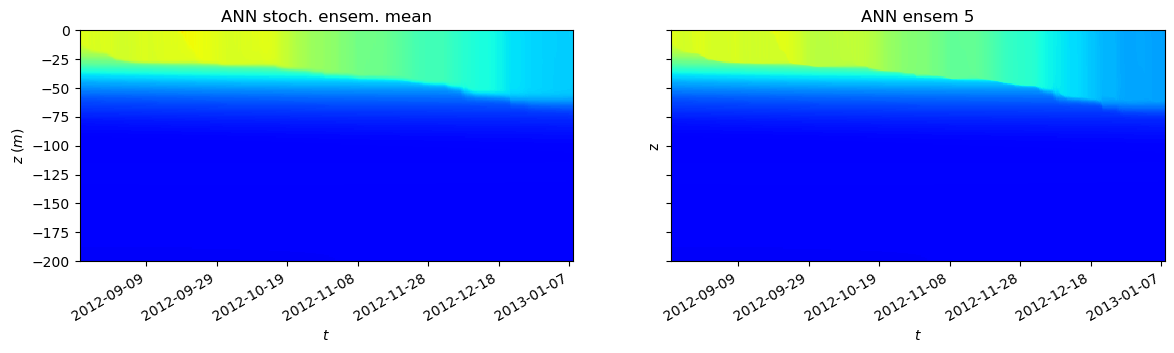

In [8]:
vmin = 2
vmax = 20

c = 'jet'

fig, axes = plt.subplots(1, 2, sharey=True, figsize=[14,3])

ax = axes[0]
T_ensem_mean = ds.T.mean(dim='ensem')
a = T_ensem_mean.plot(x='t',  cmap=c, vmin=vmin, vmax=vmax, ax=ax, add_colorbar=False)
# a = ds.T.sel(ensem=7).plot.contourf(x='t',  cmap='jet', vmin=vmin, vmax=vmax, levels=31, ax=ax, add_colorbar=False)
ax.set_title('ANN stoch. ensem. mean')
ax.set_ylabel('$z \; (m)$'); ax.set_xlabel('$t$')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))

ax = axes[1]
Nensem = 5
ds.isel(ensem=Nensem).T.plot(x='t', cmap=c, vmin=vmin, vmax=vmax, ax=ax, add_colorbar=False)
ax.set_title('ANN ensem %g' %Nensem)
ax.set_xlabel('$t$')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))

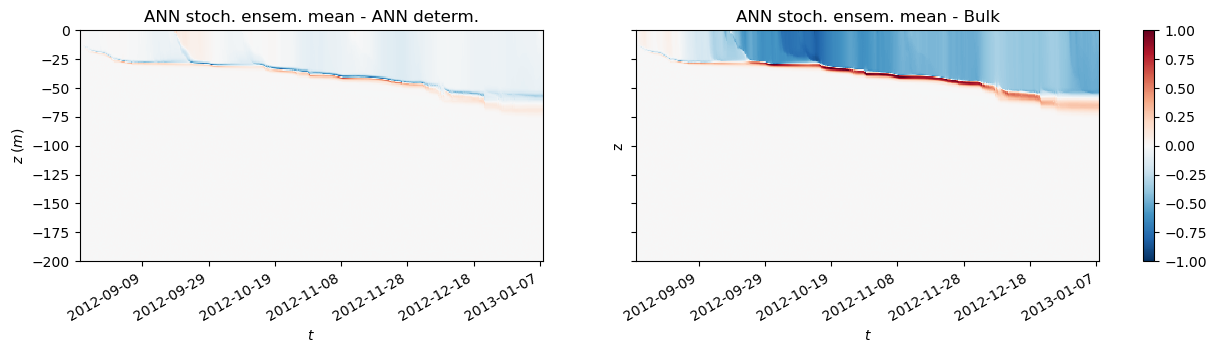

In [6]:
vmin = -1
vmax = 1

c = 'RdBu_r'

fig, axes = plt.subplots(1, 2, sharey=True, figsize=[14,3])

ax = axes[0]
T_diff = ds.T.mean(dim='ensem') - ds_mean.T
T_diff.plot(x='t',  cmap=c, vmin=vmin, vmax=vmax, ax=ax, add_colorbar=False)
ax.set_title('ANN stoch. ensem. mean - ANN determ.')
ax.set_ylabel('$z \; (m)$'); ax.set_xlabel('$t$')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))

ax = axes[1]
T_diff = ds.T.mean(dim='ensem') - ds_bulk.T
a = T_diff.plot(x='t', cmap=c, vmin=vmin, vmax=vmax, ax=ax, add_colorbar=False)
ax.set_title('ANN stoch. ensem. mean - Bulk')
ax.set_xlabel('$t$')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))

# ax = axes[2]
# ds_bulk.T.plot(x='t', cmap=c, vmin=vmin, vmax=vmax, ax=ax, add_colorbar=False)
# ax.set_title('Bulk')
# ax.set_xlabel('$t$')
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))

cbar = fig.colorbar(a, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

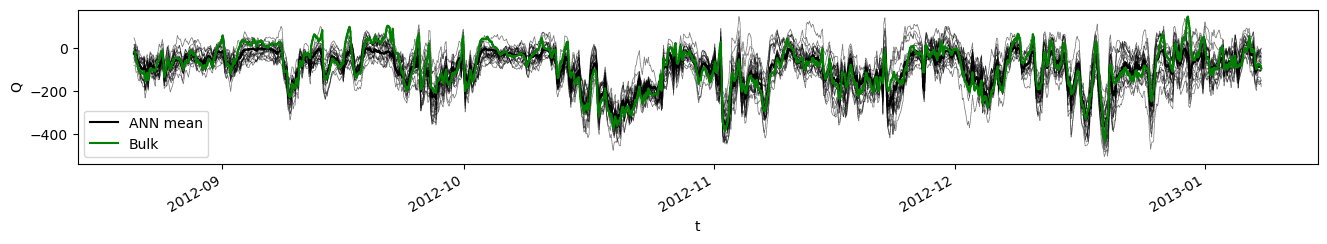

In [8]:
fig = plt.figure(figsize=[16,2]); ax = plt.gca()

for i in range(0, ENSEM):
    ds.isel(ensem=i).Q.plot(alpha=0.5, lw=0.5, c='k')
    ax.set_title('')
    
ax.set_ylabel(r'$Q\:(W/m^2)$')
ds_mean.Q.plot(c='k', label='ANN mean')
ds_bulk.Q.plot(c='g', label='Bulk')
plt.legend()

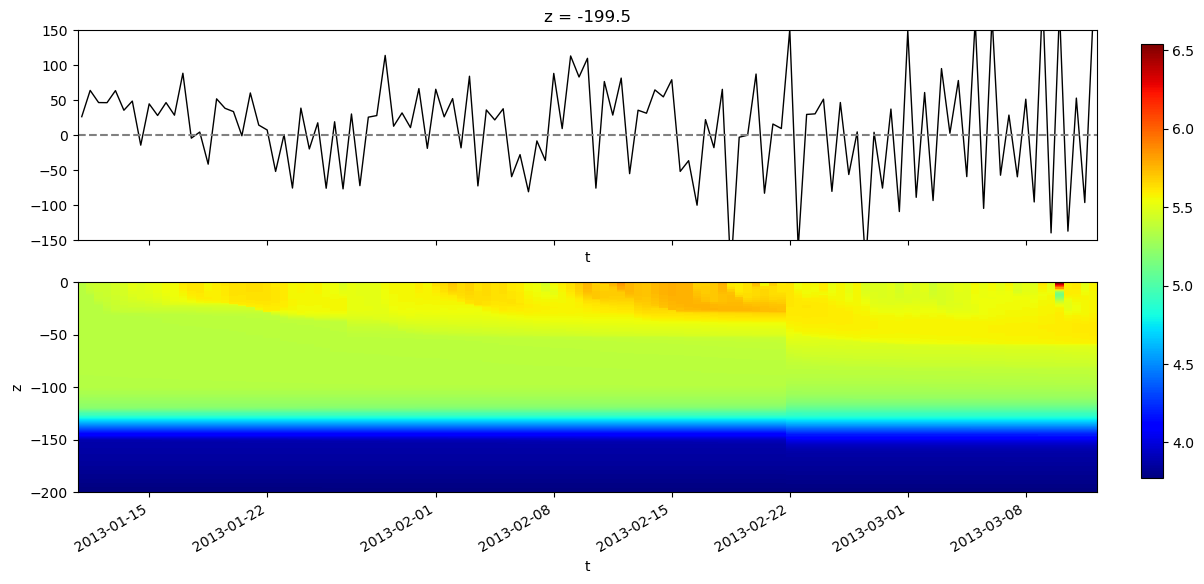

In [12]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=[14,6])

N = 14

heat = ds_bulk.Q + ds_bulk.swr.isel(z=0)
heat.plot(ax=axes[0], c='k', lw=1)
axes[0].axhline(y=0, c='gray', linestyle='--')
axes[0].set_ylim([-150,150])

tprof_diff = ds_bulk.T
a = tprof_diff.plot(x='t', ax=axes[1], cmap='jet', add_colorbar=False)
cbar = fig.colorbar(a, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

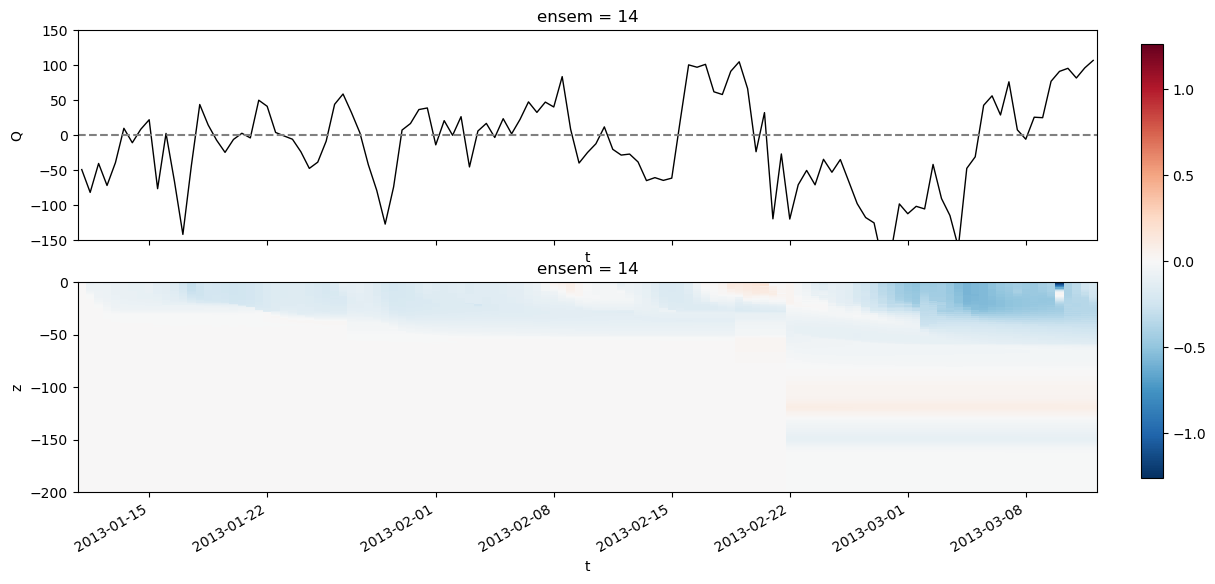

In [8]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=[14,6])

N = 14

Q_diff = ds.sel(ensem=N).Q - ds_bulk.Q
Q_diff.plot(ax=axes[0], c='k', lw=1)
axes[0].axhline(y=0, c='gray', linestyle='--')
axes[0].set_ylim([-150,150])

tprof_diff = ds.T.sel(ensem=N) - ds_bulk.T
a = tprof_diff.plot(x='t', ax=axes[1], cmap='RdBu_r', add_colorbar=False)
cbar = fig.colorbar(a, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

### Check short wave radiation

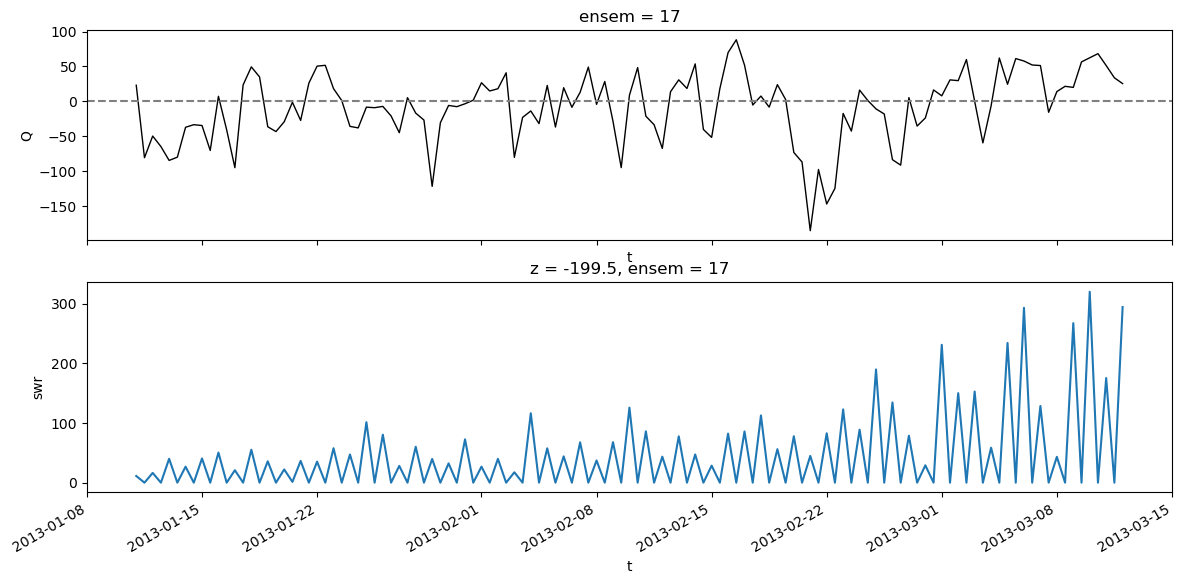

In [9]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=[14,6])

N = 17

Q_diff = ds.sel(ensem=N).Q - ds_bulk.Q
Q_diff.plot(ax=axes[0], c='k', lw=1)
axes[0].axhline(y=0, c='gray', linestyle='--')

a = ds.sel(ensem=N).swr.isel(z=0).plot(x='t', ax=axes[1])

### Check hourly outputs

In [4]:
ENSEM = 20
n1 = 280*12 + 1 # 140 days
n2 = 200 
start_date = pd.Timestamp('2012-08-21') 
folder = '/home/jw8736/test-gotm/ensem/2012-08-21_2013-01-10/'

filename = folder + 'out_hourly_'
ds = read_ensem(filename, ENSEM, n1, n2, start_date)

filename_mean = folder + 'out_ensem_mean_hourly'
ds_mean = read(filename_mean, n1, n2, start_date)

filename_bulk = folder + 'out_bulk_hourly'
ds_bulk = read(filename_bulk, n1, n2, start_date)

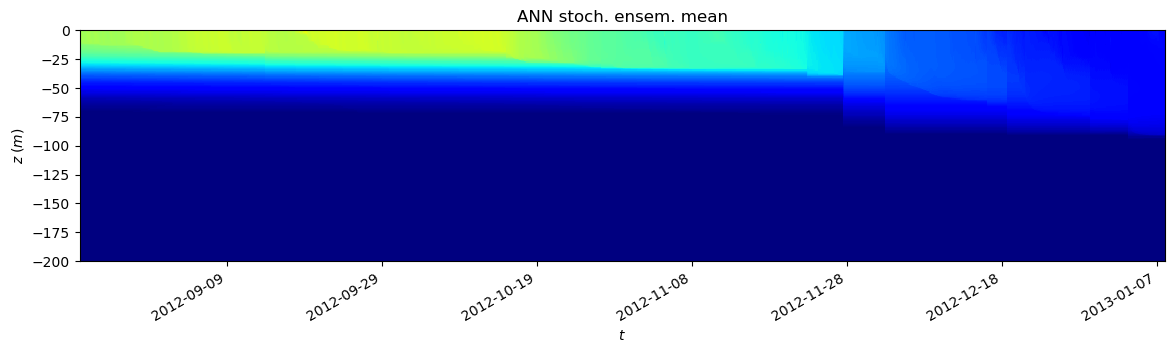

In [112]:
fig = plt.figure(figsize=[14,3]); ax = plt.gca()

T_ensem_mean = ds.T.mean(dim='ensem')
# a = T_ensem_mean.plot.contourf(x='t',  cmap='jet', vmin=vmin, vmax=vmax, levels=31, ax=ax, add_colorbar=False)
a = ds.T.sel(ensem=7).plot(x='t', cmap='jet', vmin=5, vmax=20, ax=ax, add_colorbar=False)
ax.set_title('ANN stoch. ensem. mean')
ax.set_ylabel('$z \; (m)$'); ax.set_xlabel('$t$')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))

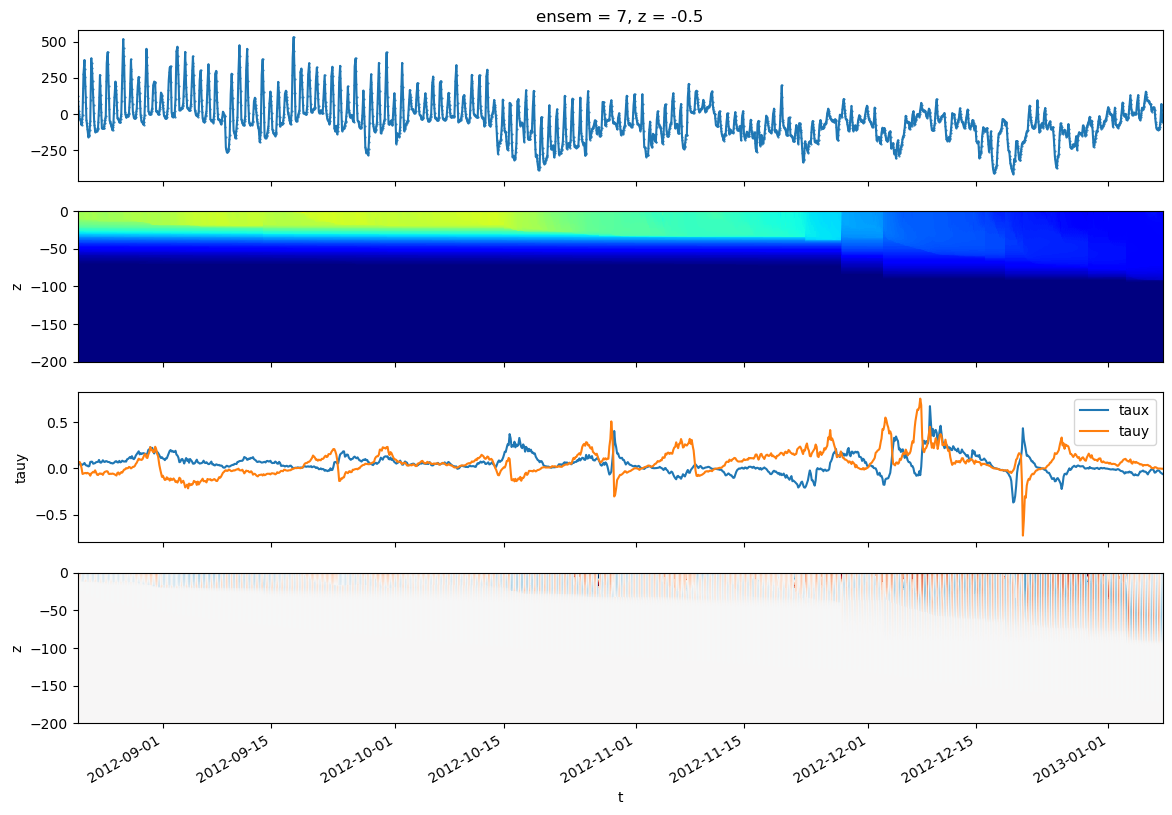

In [40]:
fig,axes = plt.subplots(4, 1, sharex=True, figsize=[14,9])

N = 6

heat = ds.Q+ds.swr.isel(z=-1)
heat.isel(ensem=N).plot(ax=axes[0], marker='.', markersize=1)

ds.T.isel(ensem=N).plot(x='t', add_colorbar=False, cmap='jet', vmin=5, vmax=20, ax=axes[1])

# ds.nn.isel(ensem=6).plot(x='t', add_colorbar=False, vmax=0.001, vmin=-0.001, cmap='RdBu_r', ax=axes[2])

ds.taux.isel(ensem=N).plot(x='t', ax=axes[2], label='taux')
ds.tauy.isel(ensem=N).plot(x='t', ax=axes[2], label='tauy')
ds.ux.isel(ensem=N).plot(x='t', add_colorbar=False, vmax=1, vmin=-1, cmap='RdBu_r', ax=axes[3])

# cbar = fig.colorbar(a, ax=axes[2], orientation='horizontal', fraction=0.02, pad=0.04)
axes[1].set_title(''); axes[1].set_xlabel('')
axes[2].set_title(''); axes[2].set_xlabel('')
axes[3].set_title(''); axes[0].set_xlabel('')
axes[2].legend()
plt.show()

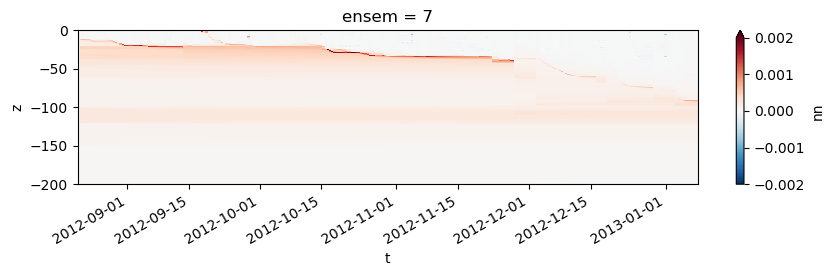

In [33]:
fig = plt.figure(figsize=[10,2])
ds.nn.isel(ensem=6).plot(x='t', vmax=0.002, vmin=-0.002, cmap='RdBu_r')

### Optional: checking fluxes

In [8]:
from mlflux.gotm import read_fluxes_old

n = 1 # which ensemble member
heat_data_file = folder + 'heatflux_ann_ensem%g.dat' %n
momentum_data_file = folder + 'momentumflux.dat'
ds_flux = read_fluxes_old(heat_data_file, momentum_data_file, datetimeformat='%Y-%m-%d %H:%M:%S') 
